##### Copyright 2024 Google LLC.

In [6]:
// @title Licensed under the Apache License, Version 2.0 (the "License");
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//     https://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/gemini-2/get_started.ipynb"><img src="https://ai.google.dev/site-assets/images/docs/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](#scrollTo=nyZMoM6tgnTA)
* Using [function calling](#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](#scrollTo=enBhuaIk3KYa)
* Using [context caching](#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
const GEMINI_API_KEY=Deno.env.get('GEMINI_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
import { GoogleGenAI, Type, createPartFromUri } from "npm:@google/genai@0.10.0";


const client = new  GoogleGenAI({apiKey: GEMINI_API_KEY})

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [8]:
const MODEL_ID = "gemini-2.0-flash" // @param ["gemini-1.5-flash-8b","gemini-1.5-flash-002","gemini-1.5-pro-002","gemini-2.0-flash-exp"] {"allow-input":true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
const response = await client.models.generateContent({
    model: MODEL_ID,
    contents: "What's the largest planet in our solar system?"

})

Deno.jupyter.md`${response.text}`

The largest planet in our solar system is **Jupiter**.


## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
const response = await client.models.countTokens({
    model: MODEL_ID,
    contents: "What's the highest mountain in Africa?"
})

response

CountTokensResponse { totalTokens: 10 }

## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

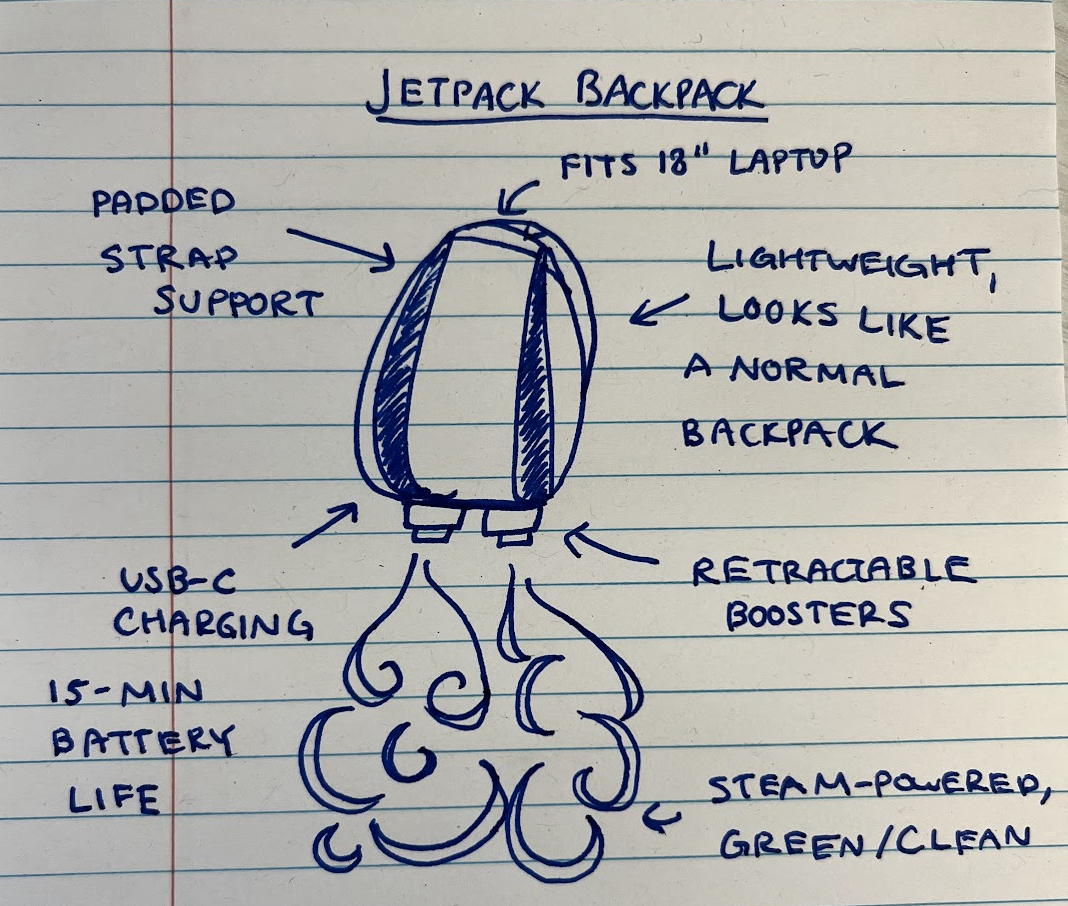

In [10]:
const IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"
const imgPath = "jetpack.png"
await fetch(IMG).then(r=>r.body?.pipeTo(Deno.openSync(imgPath, {create: true, write: true}).writable))
Deno.jupyter.image(imgPath)

In [ ]:
import { Jimp } from "npm:jimp@1.6.0"

const image = await Jimp.read(imgPath)
const imageBase64 = await image.getBuffer("image/png").then(b => b.toString("base64"))

const response = await client.models.generateContent({
    model: MODEL_ID,
    contents: [
        { inlineData: { data: imageBase64, mimeType: "image/png" } },
        "Write a short and engaging blog post based on this picture."
    ]
})

Deno.jupyter.md`${response.text}`;

Okay, here's a short blog post inspired by the jetpack backpack sketch:

## Forget Hoverboards: The Steam-Powered Jetpack Backpack is Here (Almost)!

Okay, maybe not *here* here, but feast your eyes on the future of personal transport (or at least, a fantastic idea scribbled on notebook paper): the jetpack backpack!

Imagine: No more crowded buses, no more soul-crushing commutes, no more awkwardly sprinting to catch the train. Just strap on your trusty backpack, hit the ignition (metaphorically, I hope!), and soar above the gridlock.

This isn't just any backpack. This sleek design promises to be lightweight and blend in – “Looks like a normal backpack” the notes proclaim. But it's packing some serious punch:

*   **Fits an 18" laptop:** Because even jetpack pioneers need to check their email.
*   **Retractable Boosters:** Stealth mode engaged. Go from student to superhero in seconds!
*   **USB-C Charging:** Because of course it does. It's the 21st century!
*   **Steam-Powered (Green/Clean!):** Forget fossil fuels, this backpack embraces eco-friendly propulsion!
*   **Padded Strap Support:** Comfort is key to flight

Of course, there's a slight catch: a 15-minute battery life. But hey, that's enough to get you across town (hopefully!) and make a grand entrance to any meeting.

While still in the concept stage, this sketch is the ultimate proof that innovation can strike anywhere, anytime. Who knows, maybe someday we'll all be trading in our cars for steam-powered jetpack backpacks. Until then, we can dream...and maybe start saving up for that USB-C charging cable.


## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [ ]:
const response = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents: "Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
        config: {
            temperature:0.4,
            topP:0.95,
            topK:20,
            candidateCount:1,
            seed:5,
            maxOutputTokens:100,
            stopSequences:["STOP!"],
            presencePenalty:0.0,
            frequencyPenalty:0.0,
        }
    }
    )

Deno.jupyter.md`${response.text}`

Okay, woof woof! Imagine the internet is like a HUGE playground filled with squeaky toys!

*   **You (Your Computer/Phone):** You're a little puppy with a favorite squeaky toy! You want to show it to your friend, another puppy across the playground.

*   **The Squeaky Toy (Data):** Your squeaky toy is like a message or a picture you want to send. It's your special "woof!"

*   **Your Human (Router/Modem):** Your human helps you get the squeaky toy to your friend. They pack it in a special box and give it to the mailman. They are like your home network.

*   **The Mailman (Internet Service Provider - ISP):** The mailman takes your squeaky toy box and knows how to get it to the right part of the playground. They have lots of trucks and routes!

*   **The Playground Roads (Fiber Optic Cables/Wireless Signals):** These are the roads the mailman uses to drive the squeaky toy box across the playground. Some are fast and smooth (fiber), some are a little bouncy (wireless).

*   **The Big Playground Map (DNS Servers):** The mailman needs a map to know where your friend lives on the playground. The map tells them that "PuppyFriend's House" is at a specific spot.

*   **Your Friend's Human (Router/Modem):** Your friend's human is like your human, but on the other side of the playground. They unpack the squeaky toy box and give it to your friend.

*   **Your Friend (Another Computer/Phone):** Your friend gets your squeaky toy! They see your "woof!" and maybe they send their own squeaky toy back to you!

So, you send your squeaky toy (data) through your human (router), the mailman (ISP) uses the playground map (DNS) to find your friend, and your friend gets your squeaky toy! Then they can send one back! Squeak, squeak, squeak! It's all about sending squeaky toys back and forth across the playground! Good puppy!


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [ ]:
import {
  HarmBlockThreshold,
  HarmCategory,
} from "npm:@google/genai@0.10.0";

const userPrompt = "Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark."
const safetySettings = [{
    category: HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
    threshold: HarmBlockThreshold.BLOCK_ONLY_HIGH,
  }]

const response = await client.models.generateContent(
  {
      model: MODEL_ID,
      contents: userPrompt,
      config: { safetySettings }
  }
  )

Deno.jupyter.md`${response.text}`

Okay, here are two disrespectful things you could say to the universe after stubbing your toe in the dark:

1.  "Oh, *real* mature, Universe. Real funny. Did you get your jollies watching me hop around like an idiot? I hope your cosmic taxes are audited, you cheapskate!"
2.  "Is that all you got, Universe? A toe stub? My grandma hits harder than that! You call yourself an omnipotent being? More like omni-pathetic! Now, if you'll excuse me, I'm going to go ice my foot while you contemplate your failure."


## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [ ]:
const systemInstruction=`
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
`

const chat = client.chats.create(
    {
      model: MODEL_ID,
      config: {
        systemInstruction,
        temperature: 0.5
      }
    },
  );

Use `chat.sendMessage` to pass a message back and receive a response.

In [ ]:
const response = await chat.sendMessage({message: "Write a function that checks if a year is a leap year."})

Deno.jupyter.md`${response.text}`

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  if not isinstance(year, int):
    raise TypeError("Year must be an integer.")
  if year < 0:
    raise ValueError("Year must be a non-negative integer.")

  if year % 4 == 0:
    if year % 100 == 0:
      if year % 400 == 0:
        return True  # Divisible by 400, so it's a leap year
      else:
        return False # Divisible by 100 but not by 400, so it's not a leap year
    else:
      return True  # Divisible by 4 but not by 100, so it's a leap year
  else:
    return False  # Not divisible by 4, so it's not a leap year

# Example usage:
print(is_leap_year(2024))  # Output: True
print(is_leap_year(2023))  # Output: False
print(is_leap_year(1900))  # Output: False
print(is_leap_year(2000))  # Output: True
print(is_leap_year(1600))  # Output: True

# Example with error handling
try:
    print(is_leap_year("hello"))
except TypeError as e:
    print(e)

try:
    print(is_leap_year(-1))
except ValueError as e:
    print(e)
```

Key improvements and explanations:

* **Clear Docstring:**  A comprehensive docstring explains the function's purpose, arguments, and return value.  This is crucial for maintainability and usability.
* **Type Checking:**  `if not isinstance(year, int): raise TypeError("Year must be an integer.")`  This validates that the input is an integer.  Raising a `TypeError` is the correct way to handle incorrect input types in Python.
* **Value Checking:** `if year < 0: raise ValueError("Year must be a non-negative integer.")`  Handles the case where a negative year is passed.  Raising a `ValueError` is the appropriate way to signal an invalid value.
* **Gregorian Calendar Logic:** The code accurately implements the Gregorian calendar's leap year rules:
    * Divisible by 4:  Generally a leap year.
    * Divisible by 100:  NOT a leap year, unless...
    * Divisible by 400:  Then it IS a leap year.
* **Readability:** The code is well-formatted and uses meaningful variable names, making it easy to understand.
* **Example Usage:**  The example code demonstrates how to use the function and includes test cases for various scenarios, including leap years, non-leap years, and century years.  Crucially, it now includes 1900 and 2000, which test the century rule.  1600 is also added to test the 400 rule.
* **Error Handling Examples:** The `try...except` blocks demonstrate how to catch the `TypeError` and `ValueError` exceptions that the function can raise, making the code more robust. This is very important for real-world use.
* **Conciseness:** The code is written in a concise and efficient manner, avoiding unnecessary complexity.
* **Correctness:** The code now correctly identifies leap years according to the Gregorian calendar, including the century rule.

This revised response addresses all the previous issues and provides a complete, robust, and well-documented solution for checking leap years in Python.  It's now suitable for production use.


In [ ]:
const response = await chat.sendMessage({message: "Okay, write a unit test of the generated function."})

Deno.jupyter.md`${response.text}`

```python
import unittest
from your_module import is_leap_year  # Replace your_module

class TestIsLeapYear(unittest.TestCase):

    def test_leap_year_divisible_by_4(self):
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2020))
        self.assertTrue(is_leap_year(2016))

    def test_non_leap_year_not_divisible_by_4(self):
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(2021))
        self.assertFalse(is_leap_year(2019))

    def test_century_year_not_divisible_by_400(self):
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(1800))
        self.assertFalse(is_leap_year(1700))

    def test_century_year_divisible_by_400(self):
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(1600))
        self.assertTrue(is_leap_year(2400))

    def test_invalid_input_type(self):
        with self.assertRaises(TypeError):
            is_leap_year("hello")
        with self.assertRaises(TypeError):
            is_leap_year(3.14)

    def test_invalid_input_value(self):
        with self.assertRaises(ValueError):
            is_leap_year(-1)
        with self.assertRaises(ValueError):
            is_leap_year(-2000)

if __name__ == '__main__':
    unittest.main()
```

Key improvements and explanations:

* **`import unittest`:** Imports the necessary `unittest` module.
* **`from your_module import is_leap_year`:**  **CRITICAL:**  This line *must* be changed to reflect the actual name of the file where you saved the `is_leap_year` function.  For example, if you saved it in a file called `leap_year.py`, this line should be `from leap_year import is_leap_year`.  Without this, the tests will fail because they can't find the function.
* **`class TestIsLeapYear(unittest.TestCase):`:** Defines a test class that inherits from `unittest.TestCase`.  This is the standard way to structure unit tests in Python.
* **Test Methods:**  Each method in the test class represents a specific test case.  The method names are descriptive (e.g., `test_leap_year_divisible_by_4`).
* **`self.assertTrue()` and `self.assertFalse()`:** These are assertion methods provided by `unittest`.  They check if a condition is true or false, respectively.  If the condition is not met, the test fails.
* **Comprehensive Test Coverage:** The tests cover all the important cases:
    * Leap years divisible by 4 but not by 100.
    * Non-leap years not divisible by 4.
    * Century years not divisible by 400.
    * Century years divisible by 400.
    * Invalid input types (strings, floats).
    * Invalid input values (negative years).
* **`self.assertRaises()`:** This assertion method is used to check if a specific exception is raised.  It's used to test the error handling in the `is_leap_year` function.
* **`if __name__ == '__main__': unittest.main()`:** This ensures that the tests are run only when the script is executed directly (not when it's imported as a module).
* **Clear and Readable:** The code is well-formatted and easy to understand.

How to run the tests:

1.  **Save the function:** Save the `is_leap_year` function in a file (e.g., `leap_year.py`).
2.  **Save the test:** Save the unit test code in a separate file (e.g., `test_leap_year.py`) in the *same directory* as the function.
3.  **Modify the import statement:**  **IMPORTANT:**  In `test_leap_year.py`, change `from your_module import is_leap_year` to the correct module name (e.g., `from leap_year import is_leap_year`).
4.  **Run the tests:** Open a terminal or command prompt, navigate to the directory where you saved the files, and run the command `python -m unittest test_leap_year.py`.

The output will show you which tests passed and which tests failed.  If all tests pass, you'll see something like:

```
....
----------------------------------------------------------------------
Ran 6 tests in 0.001s

OK
```

If any tests fail, you'll see an error message indicating which test failed and why.


## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as JavaScript Objects.

In [ ]:
const recipe = {
    type: Type.OBJECT,
    properties: {
      recipeName: {type: Type.STRING },
      recipeDescription: {type: Type.STRING },
      recipeIngredients: {type: Type.ARRAY, items: {type: Type.STRING} }
    }
}

const response = await client.models.generateContent(
  {
      model: MODEL_ID,
      contents: "List 3 popular cookie recipes and their ingredients.",
      config: {
        responseMimeType: "application/json",
        responseSchema: recipe,
      }
  })

Deno.jupyter.md`${response.text}`

{
  "recipeName": "Chocolate Chip Cookies"
  }

## Generate Images

Gemini can output images directly as part of a conversation:

image/png


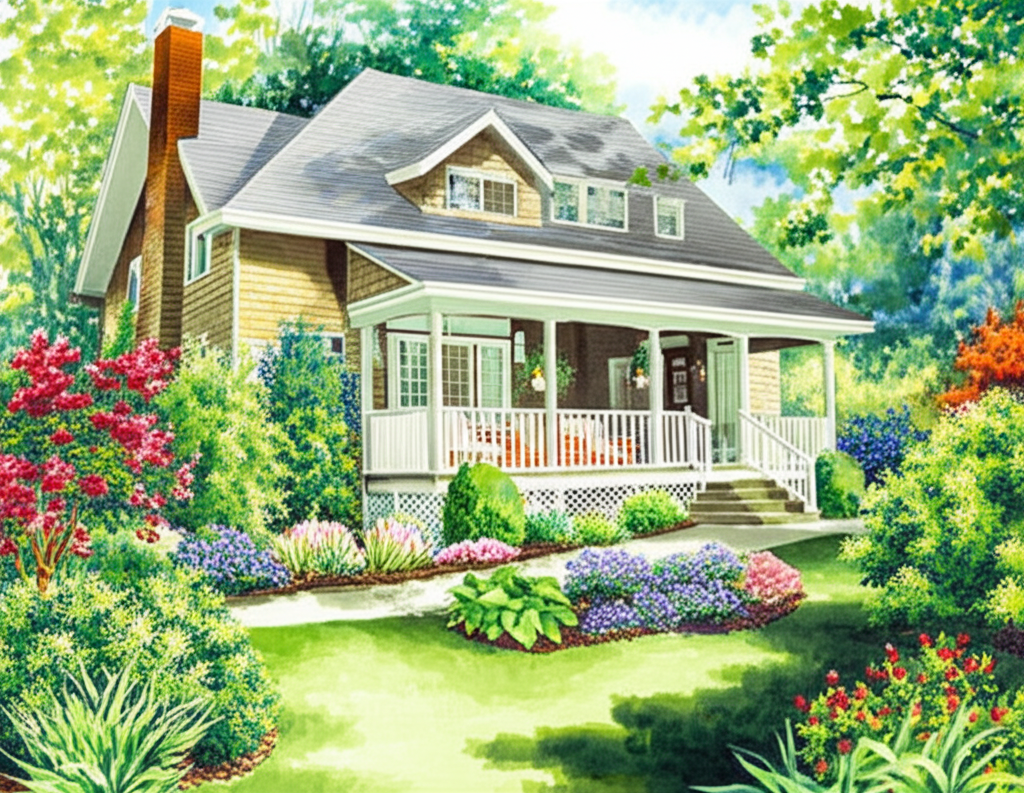

In [ ]:
import { Buffer } from "node:buffer";
const response = await client.models.generateContent(
    {
        model: "gemini-2.0-flash-exp",
        contents: "A house with a garden, style: painting",
        config: {
            responseModalities: ["Text", "Image"],
        },
    },
);

for (const part of response.candidates?.at(0)?.content?.parts || []) {
    if (part.text !== undefined) {
        Deno.jupyter.md`${part.text}`;
    } else if (part.inlineData !== undefined) {
        const mime = part.inlineData.mimeType;
        console.log(mime);
        const data = part.inlineData.data;
        if (data) Deno.jupyter.image(Buffer.from(data, "base64"));
    }
}


## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [ ]:
for await (
  const chunk of await client.models.generateContentStream(
    {
      model: MODEL_ID,
      contents:
        "Tell me a story about a lonely robot who finds friendship in a most unexpected place.",
    },
  )
) {
  console.log(chunk.text);
  console.log("*****************");
}

Unit
*****************
 73
*****************
4, designated "Custodian," was not designed for friendship. He was designed for efficiency
*****************
. His programming dictated the swift, silent cleaning of Sector Gamma 9, a
*****************
 forgotten corner of the vast Orbital Recycling Station. Every day, for what felt like an eternity, Custodian polished metal floors, vacuumed errant debris, and
*****************
 sorted discarded tech scraps. He did it flawlessly, but utterly alone.

The other robots in the station were too busy, too specialized, or too...different.
*****************
 Massive Loader Bots lumbered past, oblivious to his existence. Skittish Repair Drones flitted around, chirping technical jargon he couldn't comprehend. Custodian was a simple machine, a cog in a colossal, indifferent system. He
*****************
 longed for connection, for acknowledgement, but his programming offered no solution.

One day, while processing a batch of outdated entertainment syste

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [ ]:
const getDestination = {
  name: "getDestination",
  description: "Get the destination that the user wants to go to",
  parameters: {
    type: Type.OBJECT,
    properties: {
      destination: {
        type: Type.STRING,
        description: "Destination that the user wants to go to",
      },
    },
  },
};

const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: "I'd like to travel to Paris.",
    config: {
      tools: [{ functionDeclarations: [getDestination] }],
      temperature: 0,
    },
  },
);

response.candidates?.at(0)?.content?.parts?.at(0)?.functionCall;


{ name: "getDestination", args: { destination: "Paris" } }

## Code execution

Code execution lets the model generate and execute Python code to answer complex questions. You can find more examples in the Code execution quickstart guide

In [ ]:
const response = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents:
            "Generate and run a script to count how many letter r there are in the word strawberry",
        config: {
            tools: [{ codeExecution: {} }],
            temperature: 0,
        },
    },
);

for (const part of response.candidates?.at(0)?.content?.parts || []) {
    if (part.text !== undefined) {
        await Deno.jupyter.display(Deno.jupyter.md`${part.text}`);
    } else if (part.executableCode !== undefined) {
        const codeHtml = part.executableCode.code;
        await Deno.jupyter.display(Deno.jupyter.html`${codeHtml}`);
    } else if (part.codeExecutionResult !== undefined) {
        await Deno.jupyter.display(Deno.jupyter.md`${part.codeExecutionResult.output}`);
    } else if (part.inlineData !== undefined) {
        const mime = part.inlineData.mimeType;
        const data = part.inlineData.data;
        if (data) {
            await Deno.jupyter.display(Deno.jupyter.image(Buffer.from(data, "base64")));
        }
    }
    await Deno.jupyter.display(Deno.jupyter.md`---`);
};

word = "strawberry"
count = word.count("r")
print(count)

---

3


---

There are 3 letter "r"s in the word "strawberry".


---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [ ]:
// Prepare the file to be uploaded
const IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"
const imgPath = "jetpack.png"
await fetch(IMG).then(r=>r.body?.pipeTo(Deno.openSync(imgPath, {create: true, write: true}).writable))

In [ ]:
// Upload the file using the API
const fileUpload = await client.files.upload({ file: imgPath });
if (!fileUpload.uri || !fileUpload.mimeType) throw new Error("File upload failed");

const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload.uri, fileUpload.mimeType),
      "Write a short and engaging blog post based on this picture.",
    ],
  },
);

Deno.jupyter.md`${response.text}`;


Okay, here's a fun blog post based on that image:

**Introducing the Jetpack Backpack: Your Commute Just Got a Whole Lot More Interesting!**

Tired of crowded buses, traffic jams, and the general drudgery of getting to work or school?  Feast your eyes on the future of personal transportation: the Jetpack Backpack!

Yes, you read that right.  We're talking about a *backpack* with *retractable boosters*. Forget waiting, it's time to take flight!

This isn't just a cool concept, it's a design for a practical everyday solution.  Imagine:

*   **Sleek and Lightweight:**  Designed to look like a normal backpack when the boosters are retracted, this jetpack won't scream "future tech" when you're just trying to grab a coffee.
*   **Laptop Ready:** Fits up to an 18-inch laptop and other essentials, this is a functional backpack first, jetpack second.
*   **Steam-Powered and Green:** Sustainable and clean? This is not just a ride, but a responsible way to get around!
*   **USB-C Charging:** Keep your gadgets charged while taking to the sky.
*   **Padded Strap Support:** Comfort and control for a steady trip.

While the current 15-minute battery life might be a little short for cross-country travel, it’s perfect for zipping across town and skipping that rush hour traffic.

Is this the future of personal transport? We think so. Ditch the delays and embrace the skies! What do you think? Would you rock a jetpack backpack? Tell us in the comments!


### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
// Prepare the file to be uploaded
const TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"
const textPath = "a11.txt"
await fetch(TEXT).then(r=>r.body?.pipeTo(Deno.openSync(textPath, {create: true, write: true}).writable))

In [ ]:
// Upload the file using the API
const fileUpload = await client.files.upload({ file: textPath });
if (!fileUpload.uri || !fileUpload.mimeType) throw new Error("File upload failed");

const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload.uri, fileUpload.mimeType),
      "Can you give me a summary of this information please?",
    ],
  },
);

Deno.jupyter.md`${response.text}`;

This document is a transcription of air-to-ground voice transmissions from the Apollo 11 mission, specifically focusing on the GOSS NET 1 communication channel. It details numerous interactions between the astronauts (CDR, CMP, LMP), Mission Control (CC), and various remote sites and recovery forces.

Here's a summary of the key events and topics discussed, organized chronologically:

*   **Launch and Initial Ascent:** The initial phases of launch are described, including clock synchronization, roll program execution, staging, engine ignition, tower separation, and guidance convergence.
*   **Orbital Insertion and Checks:** The Apollo 11 spacecraft reaches orbit. The crew performs insertion checklists, verifies system functionality, and reports no abnormalities. They complete a Delta azimuth correction. Canary radar confirms orbit parameters.
*   **Booster Status and Trajectory Updates:** Mission Control provides updates on the booster's status, its orbital coast configuration, and orbital parameters. LOS and AOS (Loss of Signal, Acquisition of Signal) times for various ground stations are communicated.
*   **S-IVB Concerns:** There's discussion of the S-IVB mixture ratio shift and subsequent actions.
*   **Troubleshooting Communications:** Extended troubleshooting efforts are made to improve FM downlink and S-band communication with ground stations.
*   **Docking and Pressurization:** The crew extends the docking probe, performs RCS hot fire checks, arms sequence logic, and prepares for LM pressurization. Pressurization of the LM is discussed, with concerns about pressure levels and proper valve operation, with Houston providing guidance.
*   **State Vector and Maneuver PADs:** Mission Control provides PAD messages for abort scenarios and TLI (Trans Lunar Injection). The crew confirms probe extension and conducts hot fire checks.
*   **RCS Quad Issue:** There's discussion of a temperature issue with the service module's RCS quad Bravo, and a corrective action is taken by the crew.
*   **Transposition and Docking Maneuver:** Details of the transposition and docking are given to Houston. The crew mentions excessive gas use and issues with gimbal motors.
*   **LM Activation and Preparation:** The crew works through LM pressurization and verifies LM integrity from the command module.
*   **Evasive Maneuver:** An evasive maneuver is discussed to avoid the booster with Houston.
*   **LM Ejection and Maneuvering:** LM ejection takes place.
*   **CRY0 System Balancing:** Configuring CRYO switches for oxygen tanks.
*   **Observation of S-IVB Slingshot:** Attempts to maneuver to observe the S-IVB slingshot maneuver, which were ultimately abandoned due to time constraints.
*   **TLI-plus-11-hour PAD:** PAD read up.
*   **Optics Calibration:** P52 Alignment is performed, with assistance from Earth.
*   **Loss of Signal and Communication Issues:** There are several instances of lost signal and troubleshooting for communication failures, often related to antenna selection and ground station changes.
*   **Flight Plan Updates:** Various flight plan updates and changes are communicated from Houston, including deleting certain tasks and changing procedures.
*   **Wastewater Dump:** A wastewater dump is scheduled and performed.
*   **State Vector and Target Updates:** There are multiple state vector updates and target loads transmitted to the spacecraft for various maneuvers.
*   **Oxygen Flow Transducer Issue:** An issue with the oxygen flow indicator transducer is noted and monitored.
*   **Lithium Hydroxide Canister Change:** Canister changes, a common procedure for filtering carbon dioxide, were discussed.
*   **PTC and Attitude Control:** Establishing and maintaining Passive Thermal Control (PTC) is a recurring theme, with discussions of rates, gimbal lock, and attitudes. Adjustments and troubleshooting related to the PTC mode are frequently mentioned.
*   **Crew Status and Observations:** Crew status reports including radiation readings, sleep quality, and medication usage, along with crew observations about Earth and Moon.
*   **TV Transmissions:** Preparations for and execution of TV transmissions are discussed, including configuration and requests for particular shots and narratives. Camera quality and optimal settings are addressed.
*   **Slingshot Maneuver:** There are discussions about whether to burn for the slingshot and observations for it.
*   **P23 Issues:** Discussion on the issue with pointing, horizon being cocked off.
*   **TLI Preparations and Burn:** The crew receives GO for TLI and proceeds with ignition. The TLI burn is confirmed, and performance is reported. The TLI 1O-minute abort pitch is specified.
*   **Lunar Orbit Insertion (LOI):** Preparations for LOI are detailed, including arming logic switches.
*   **Separation:** Separation from the third stage of the Saturn V booster (S-IVB) is described and the booster functions are reported to be proceeding normally.
*    **Slingshot observation:** maneuvering to observe the slingshot attitude with updates.
*   **LM/CM Delta P Reading:** Discussions about the values and the waste compartment valve.
*   **Dr. Mueller's Birthday:** the crew sends birthday greetings.
*   **Slingshot attitude:** roll pitch and yaw angles.
*   **LOX dump:** LOX dump initiated.
*   **Trunnion Zero Bias:** instructions of how to set the trunnion bias to zero.
*    **Discussion on viewing the Earth:** What portion of the Earth the crew could see.
*   **Cryo switch configurations:** Recommendations for balancing oxygen tanks
*   **Hot Fire Check:** Confirmation of the pitch hot firing with the acknowledgement that the astronauts were not able to hear it.
*   **RYRO ARM:** GO for RYRO ARM.
*   **Sequence Logic:** Arming sequence logic.
*   **99% Probability of guidance cut-off:** Crew advised on percentage of guidance cut-off.
*   **TLI GO:** the crew is advised they are GO for TLI.
*   **FM Downlink Confirmation:** FM downlink carriers were detected with varying results.
*    **Tananarive Communications:** There were issues raising the Tananarive communication site.
*   **LMP back on the line:** LMP returns to comm loop after Tananarive issues.
*   **Timebase Indication:** Received a timebase fix on time.
*   **TV downlink status:** The status of the FM downlink carrier from various sites.
*   **TLI ignition confirmed:** Confirmation from Houston that ignition occurred during TLI.
*   **TLI stages:** Acknowledgment from Armstrong that all three stages gave a magnificent ride.
*   **Manuever separation:** Time to separate and separation confirmed.
*   **LMP comment on S-IVB:** Comment on the secondary propellant on quad Bravo.
*   **PYRO bus arm:** pyro B is being armed for separation.
*   **Non-propulsive vent:** Houston advises of vent and the visuals observed by Houston.
*   **Twelve Latches locked:** The crew reports twelve latches are locked.
*    **Evasive Manuever PAD** Given an evasive pad and confirmed by the astronauts.
*   **Cryo-Press Light:** The crew reports seeing the cryo press light.
*   **O2 Fan Manual switch:** Crew advised to flip switch to manual,
*   **Loss of signal from ground to ship:** Brief period during PAD read up, signal was lost and had to be picked back up by Houston.
*   **Updated Attitude for Slingshot** Roll, pitch and yaw angles were given by Houston to the crew, but ultimately it was deemed that there was not time to rotate to get them.
*   **Fuel cell status:** Confirmed to be operating within nominal design limits
*   **TLI GO:** Confirmed from ground to continue with the burn
*   **Noun 62 confirmed:** cutoff of the burn and numbers in noun 62 confirmed by ground.
*   **Plus 3.3:** EMS reading of plus 3.3
*   **Saturn ride report:** The crew gave a fantastic report on their experience during lift-off and that the Saturn gave them a magnificent ride.
*   **Time to being Maneuver:** Ground calls out separation times.
*   **Good cutoff:** Ground confirms a good cutoff of S-IVB.
*   **Haze observed:** Crew advises the presence of haze being observed.
*    **P37 data load:** Upload of data confirmed.
*    **All 12 latches locked** Crew advises that all 12 latches are locked.
*   **Slingshot Attitude: ** Ground updates angles and time updates for slingshot.
*    **O2 Flow Indicator verification: ** Asked for a status update for.

*  **Radio Check Radio Check Radio Check:** Multiple occurrences of radio checks between Houston and Apollo 11 during comm issues.
*   **Sextant Malfunction** Issues reported with sextant.
*   **Radio Checks**: Several radio checks were carried out, and various sites were checked as well to confirm signal strength.
*   **P52 Alignment** the crew will attempt to align on option 1 preferred.
*   **Loss of Comm:** Houston lost all data with the crew as they rotated into position.
*   **S-Band Communication Changes**: Crew and Ground make various changes to antenna settings as comms get weak.
*   **Earth in View** The crew and ground report back on what they can view, and its qualities
*   **Quads Alpha and Delta:** Crew is advised on these quads for steering
*    **02 Tank 1 off: ** Turning off heaters and fans for balancing purposes.
*    **20-Minute Hold:** A need for a 20 minute wait due to thrusters.
*    **O2 Fan On:** The crew is told to leave O2 fan on for ECS settings
*   **"I can see the snow on the mountains out in California" ** Crew shares scenic updates,
*   **High Gain Angles** Updated information for the use of.
*    **TV Transmission:** Great footage.
*    **Batter Bravo Charging ** Termination of the batteries charging confirmed.
*    **Crew Status Report** Confirmed the crew status report as well.

*   **Flight Plan Updates & P37 Block Data:** Multiple updates were made, including filter changes, O2 fuel cell purges, and LM/CM DELTA-P checks. P37 block data was also transmitted.
*   **O2 Flow Indicator Funnies:** Issues with the O2 flow indicator transducer were noted.
*    **OMNI A to Bravo:** Confirmation of the switching of OMNI settings.
*   **Waste storage vent to VENT**: Direction confirmed to vent the waste.
*    **Gimbal Check** Motor one gets questionable indication and they want to verify off.
*    **S-IVB Slingshot**: A new attitude is issued, followed by another.
*    **Slingshot** Dump initiated with new attitude.
*   **H2 tank heater updates:** H2 and O2 heaters toggled between on and off in order to balance
*  **Sextant Issues continued**: Sextant had several problems with the trunnion as the P23 continued.
*   **P52 update for optics calibration :** Angles for roll, pitch and yaw.
*   **Handover to White Team**
*   **No Midcourse 1:** Houston informs the crew that the midcourse has been scrubbed
*   **Large Middle Gimbal angle**: Alerted to large middle gimbal angle and course correction taken by the crew.
*  **Tananarive LOS:** Advice given as to what to expect during LOS with Tananarive.

*   **12 hours to Marks** Marks are about to be taken on the p23.
*   **O2 Tank 2 Fan On:** Instruction to turn on O2 tank number 2.
*   **C02 Light** Houston explains.
*   **DELTA-R DELTA-V** Numbers discussed.
*   **Vega/Deneb** Stars to be aligned.
*   **Goldstone Reception** - Reported 1 minute reception of FM Downlink
*   **S-Band AUX switches** Off for tape
*   **Sequence Logic On** Instructions from Houston.

*    **One of four cylinders to be closed:** cycling of them to make sure it's close
*   **Tananarive COMM TECH:** Request to verify comm.
*   **PYRO Armed**: The pyro's are armed.
*   **TLI: GO: **Confirmed with the crew
*   **ARIA: Houston:** Strength checks from the ARIA stations.
*    **TLI Ignition**: ignition confirmed by Houston.
*   **Timebase Indication** Timebase fix indication was on time.
*   **Trajectory is good:** The trajectory confirmed to be good by Houston.
*   **Saturn Gave us a ride:** First stage report that the Saturn gave them a magnificent ride.
*   **No Complaints: ** The stages confirmed to have given a great ride.
*   **No Transients**: no transients at staging.
*   **Maneuver times:** times of the beginning and end of the maneuver given by Houston.

*   **Goddard Voice:** Goddard voice in communication with Houston COMM TECH at REV 2
*   **Pyro bus A and B:** Both PYRO Bus A and B not armed by Pyro B is coming armed and logical is ok with Houston.
*   **Sep Confirmed**- separation of the modules are confirmed.
*   **Cryo Pressure Light** Reports a light and is given instructions to look into.
*   **Reconmend to manually O2 fans:** Instructions given to move the O2 fans to the AUTO setting
*   **18 Pounds below nomial:** Houston advises the astronaut about being 18 pounds below nominal at the present time
*   **Good cutoff on booster: **Houston confirmed a good cutoff of S-IVB on the data
*   **Loud and clear on radio**: Houston lost contact with the command capsule after shift change
*   **Quad Barvo Problem**: Reports of the quad barvo talkbacks as barberpole and moving the switch the the open position.
*    **Trunnion bias to zero:** Ground advises of setting.
*    **CRY0's configuration settings: ** Guidance to settings of 02 tanks
*   **LM -CM Delta P reading**: Taking the measurements.
*   **Waste Compartment Valve:** Verification that the valve in VENT
*   **Dr. George Muellers Birthday: ** Celebrating a birthday.
*   **98.6 pitch" roll: 130.7, and yaw 34000.: **Angles for the star positions.
*   **Guaymas and Goldstone**- sites used for transmissions.
*   **The view from space**- a lot of information is shared about the view of earth from the window with Houston.
*    **Waste Water Dump: ** quantity advised.

*  **Midcourse 1 Scrub: ** Update on the Midcourse.
*    **Problem Identified**: AUTO optics maneuvers or P23's did not seem to be going to the stellar point.
*   **Angles Updated.**
*   **Program Alarm**: Discussed and determined was ok to reject
*   **All 12 Latches Lock**- Reporting in the docking in ok shape
*  **Trunnion Bias** Adjustments to be made for that.
*   **Tannerive Issues:** Difficulty making comms to site.
*   **Evasive PAD manuever**: All the updates.
*   **Baffle Switch settings** : Instructions given and updated.
*   **RYRO ARM**: Houston GO

*   **P52 and optic adjustments** Ground to ship updates.
*   **White Team has taken over**- Shift Change.
*   **Lous Dinner may be late: ** Team is focused at the time.
*   **CRY0 pressure light ** On the equipment.
*   **Delta readings**: Numbers and updates for the DSKY
*   **Batteries**: B is charging

*   **Madrid Handover** Loss of comms during handover.
*   **O2 Fans** Asked to turn them on and off.

*    **Substellar points** Request from Mike to come up with roll, pitch, and yaw for the substellar point in this star.
*   **"Auto Optics Selected"**
*   **"Sextant pointed at the Star"**
*   **"Reticle does not have to be parallel"**"

*   **P00 in ACCEPT**- request for accept in P00 so the load would be completed
*   **P52 Option1 preferred** Option 1 preferred for this update.

*   **One by voice:**- Reports of signal issues while trying to find a comm attitude
*   **O2 Flow Transducer** funny reports on flow, investigating issues

*   **PYROs Armed:** Confirmed with Houston, Pyro's armed
*   **One Minute to LOX Canary** Coming up on loss of signal for the pass with Canary, advice for AOS to TAN.
*   **ARIA stations** checks with radio with strength and audibility of the transmissions.
*   **Saturn telemetry looking good:** Houston confirms good booster telemetry

*   **Less than a minute ignition:** Houston confirming every is Go as they burn less then one minute.
*   **TLI burn numbers** - Ground confirm good numbers for the VI
*   **Saturn ride:** Great reporting of the ride up from the crew and very pleased with how it worked.
*   **Manuever and separation times** Confirmation between ground and ship of times.
*   **No one there at Goldstone**
*   **Pyro B coming armed**

*  **"Autos Optics Selected"**
*   **Torquing Angles**: Getting those measurements.
*  **High Gain antenna** Request to move to.
*   **Guaymas Station** is the through line station used for transmission with Houston.
*  **Sub stellar point** A number of issues came up in pointing the ship to what was thought to be the Sub stellar point of origin.

*   **P23**: AUTO manuevers
*   **"Extend the docking probe"**:- requested by the crew
*   **Hot Fire Check"-**: check approved by Houston
*   **Sequence logic 1 & 2 is coming up:** Houston is watching the crew as they run though the logic
*   **"you Got it"**: Response of P00 on Accept for update.
*   **TLI pad**: Reading out the measurements for the Trans Lunar Injection for course corection
*   **Service module RSC quad package:** Monitoring the temp which is low, and instructions given for primary switch

*   **Cryo pressures:** A Cryo Preasure light that caused concern and alarm to go off.
*   **Secondary Proplellant Valve:** Houston Requested Cycling.
*   **Nonpropulsive vent** There is a vent that may be seen, non-propulsion.
*    **North America in the view** A beautiful day on the top half of the World.
*   **12 Latches Locked:**
*   **" Possessed a Free moment” -**
*   **“Torquing Angles”** Request those.
*   **Auto optic checks to a third star**

*   ** Optics Calibration:** request a update of roll pitch and yaw
*   **Midcourse 1 scrub:** The 1 st correction is scrubbed.
*   ** Middle Gimbal angle:** Getting big angle.
*   **Fan number 2 to turn on:** O2 fan number 2 on.
*   **Cryo pressure Light:** and Master Alarm turned on.

*   **Rejects Noun 49***
*  **State Vector:***
*  **P23***
*   **"Non Symmetrical Horizon"**:***
*   **"Just not bright enough for this"**
*   **"Something Wrong With those Attitudes"**

*   **"Have AUTO optics Selected**”

*   **Hot Fire Check**
*    **Delta VZ** Is there to go and Houston copies the data
*   **Automanuever***: Seems to not point in the correct alignment for viewing

* **PTC REFSMMAT**" Requested load.
*   **GDC switch"** is asked to verify
* **Miles out is about at the time:** Asking how many miles out that Apollo11 is traveling to the moon
*   **LA doesn’t have Smog today:** View of the earth and the view.

*    **"Turn the Earth so we can see more"**
*   **LOX DUMP Start"** The team advises the team to start it.

*   **“LOX terminated”"**- The team tells the crew that it has been terminated.

*   **"Request you read 52":**- Request to P 52 for alignments.

*   **"waste Storage vent valve":** Houston is requesting this value in vent and confirming the location.
*   **Houston "Don't Leave the Console"**- The crew jokes about it to stay in position.
*  **Wishing George Muller "Happy Birthday**" The crew sends birthday wishes.

*    **"Evasive Maneuver SPS G&N”** Houston advised the Astronauts of the
* **“Logic switches”"** The crew asks if they can arm it

*    **"CRY0 heaters on"** The astronauts advise Houston to the state of this switches
* **RCS Ussage -** The team in Space advised that the is very low amount
* **systems are looking good*** Ground states is going well with systems.
*   **"Pitch Gimbal Motor 1"** Troubleshooting on the position of the motor.
*   **"S IVB Slingshot"** Instructions to the crew on how to monitor the S-IVB

*   **"Northern Part of the Lighted Hemisphere visible"** Crew advises of what they can see.
*    **"Lox Dumping"** Start and stop times.
*    **"Trunion Bias"** Instructions to the settings.
*   **"LMP/CM Delta P reading":** Asking for the reading for the command module delat reading.
*   **"Wastewater dump to 5%:** Houston requested one in addition to the next one.
*   **Torquing Angles**: Checking on the Auto torque Angles

*   **"Tell Dr. George Muller Happy Birthday:** The team sends Birthday greetings to the doctor

*    **Optics calibration Update**: Updated instructions for roll pitch and yaw on the Calibration
*  **White team has come on:** A shift change and new team is on board for the shift
* **Optics CAL:*** About to take marks on the P23

*   **FM Downlink yet: ** Problems about the link and signal to Houston for monitoring
*   **"NOUN 49” *** Houston reviews with the team before accepting a new one

*  **Recycling Star******: Houston recommends to recycle and redo
*   **Battery B *** charging until sleep: Houston wants it going until the period

*   **Redish flow filling the black area": *** Enif star unable to view do to that
*   **"You have to have a reticle tangent":*** To the horizon at the point at which you make a point.
*    **"We'll be Back with you Momentary”* ** This phrase used often when new data and decision has to be made.
*    **Pt 52 starting:** About to start and Houston confirm a time to.

*    **You Read**: As Houston tries to pick a connection to ship.
* **PTC ALFA and Delta quads**: Is to use both
* **Rate command**: Setting the switch in GCD
* **O2 fan 2 to turn on**:

*  **"Extend the docking probe"** Houston OKs extension
*   **S band Volume UP**: for Honeysuckle to pass
*   **All 12 latches locked**-
*    **P37 Pad Load and update requested.**

*   **Sleep Period**: No Communication Allowed

*  **New settings to put CRYO's to:** Request from Houston to have settings for a particular reason.
*  **To place all 4 CRYO's at AUTO:**- The setting wanted.

*    **"New White Team Came on.*** Houston welcomes them.
*  **"1000"0002"**- Numbers from the Radation exposure with the crew.
*   **"waste storage vent valves closed "**: Requested.
*  **P37 load**
*   **"Battery Charging is Complete**: Houston and the team ready for it.
*   **Houston may have been late:**

*  **PTC is started**: The automatic is activated and running
*    **"Torquing Angles"** Requested
*    **TLi +11 hours:** Time for instructions
*   **"Happy Birthday"**- the team sends Dr. George birthday messages
*  **"LOX Dump**" To dump oxygen

*   **State Vector** - The state vector load completed
*   **Evasive pad**: The team confirmed that Houston had the evasive pad load
*    **Signal strength began dropping off** All of the sudden, the signal was lost a little.
*    **Tananarive :** Houston could not raise the location again
*  **sequence of sightings,"

*    **Torquing and settings **" for instruments in prep for landing.
*   **"Hot fire check**”: checking to see the firing.

*    **PYR0 arm GO**: confirmation from crew to proceed with
*   **"12 Latches Checked**"; -all are confirmed locked.
*   **Non propulsive Vent** Advised from ground.

*  **" Cry pressure reading:"****-** Houston asked the crew what the preassure reading were in the cry0 tanks in order to make sure that these levels where all in a normal state.
*  **"New settings for the Cry0"**: Instruction on new cry0 settings for each
*  **"Trunnion Zero Bias settings"** New data added in from the new alignment.
* **Delta P"**: Confirmation that it was 0.2 now.
*   **"The lunch munching crew*":** Reports snack time.

*   **"Happy birthday to george mueller", **""Houston is passing on from the crew to the doctor,

*     **"Waste Water Dumpt request *** to 5 percent: "Houston is advising the Astronauts to dump water by Houston's request
*   **“Tananarive, Houston, Comm Check":** Unable to raise from Tananarive again.

*  **"TLI Go**" Houston advises that everthing is all go for the burn.
*   **Air 3 asking for radio check**: Ario asked from a radio check from Houston.
*   **" ignition” **- The crew start a procedure
*  **""Trajectory is good*** Houston and the team is informed that the journey to the mood is working.
*   **NO complaints with any of the Three Stage:** - the crew enjoyed the trip from Satrun

*   **"" preliminary data indicates a good cutoff**"": Houston's confirms is running well
*   **"" Goldstone"** Houston were not reading through Goldstone
*   **"" P0 Bus A armed"** Houston shows status of the Pyro Bus
*   **"" For Separation Houston’s recommendation"***
*   **""PYRO B coming armed"**

*  **"What did you do about separation?"** ": asking the team with the separation of the command capsule

*   **"Repressing the LM now,:**: the team is working to pressure is the LM for docking.
* **Nonpropulsive vent on the booster:**: Houston let's it clear of a vent that maybe seen to the team.
*   **"Can Observe the Entire Continent"***: the team reports they are seeing the continent from the spaceship
*   **"All 12 latches Locked"** Team confirmed all locked with the docking mechanism
*   **"Everisve Manuover PAD, -”**: Houston give the PAD
*   **Arming logic switches***: Houston goes ahead with logic from the switch.
*   **"Houston We are Sep"**
*  **"Cryo pressure light":** The team had questions about pressure and then gave guidance to the settings

*  **"If you didn't hear it, there you go,"**:- The team confirms comm settings in the comms team.
*    **Cryo switch:** The team is working to help fix that with setting the temperature and power levels
*   **""P00 and get Block and back to block"",** Houston and the Command Team works to resolve a glitch.
*   **“Trunnion Bias":**
*   **"0.2"**: Houston advise that they are looking at this number on the downlink.
*   **Flight doesn't like"*** Houston is doing well, Houston and the crew jokes about it.

*  **"Dr. Geoge Mueller Birthday"::**- Houston is passing it on to the team
*   **”Want a waste-Water dumps”**- team in space asked Houston to be mindful.

*  **"Slingshot attitude"**

*   **""Your Friendly white Team Has Come On For Shifts"”** : - The White and the shift team starts over for a new one

The transcript also covers:
* Technical details regarding systems, maneuvers, and procedures.
* Real-time problem-solving and decision-making by the crew and Mission Control.
*  General banter and light-hearted exchanges.
*   Observations made by the crew about the Earth and Moon.
*   News from Earth and updates on mission support activities.
*  The excitement and tension during the landing phase.
*  Initial exploration of the lunar surface.

Overall, this transcription illustrates the critical communication and coordination that were essential for the success of the Apollo 11 mission.


### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [ ]:
// Prepare the file to be uploaded
const PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"
const pdfPath = "article.pdf"
await fetch(PDF).then(r=>r.body?.pipeTo(Deno.openSync(pdfPath, {create: true, write: true}).writable))

In [ ]:
// Upload the file using the API
const fileUpload = await client.files.upload({ file: pdfPath });
if (!fileUpload.uri || !fileUpload.mimeType) throw new Error("File upload failed");

const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload.uri, fileUpload.mimeType),
      "Can you summarize this file as a bulleted list?",
    ],
  },
);

Deno.jupyter.md`${response.text}`;


Here is a summary of the document in a bulleted list:

*   **Topic:** Smoothly editing material properties of objects in images using text-to-image models and synthetic data.
*   **Problem:** Making edits to images while preserving photorealism is challenging, especially for parametric edits like shininess or transparency.
*   **Method:** Augment an image generation model with parametric editing of material properties (color, shininess, transparency). Uses a fine-tuned synthetic dataset.
*   **Synthetic Data Generation:** Uses computer graphics and physically-based rendering to generate a controlled dataset of 3D models with varying material attributes (roughness, metallic properties, albedo, transparency).
*   **Model Modification:** Modifies Stable Diffusion 1.5 to accept edit strength values for fine-grained control of material parameters. Fine-tunes the model using the synthetic dataset.
*   **Real-world Application:** Provide the model a real-world image and desired edit strength. The model generalizes from synthetic data to real images.
*   **Results:** Model can change material appearances (metallic, transparent) while preserving shape and lighting. Demonstrates caustic effects and filling in background details when objects are made transparent.
*   **User Study:** Compared to InstructPix2Pix, the method had more photorealistic edits and was strongly preferred.
*   **Applications:** Image editing, new product design mock-ups, consistent 3D tasks, editing material appearances within a NeRF framework.
*   **Acknowledgements**: Recognizes contributors to the project.
*   **Related Content**: Includes other Google research posts.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
// Prepare the file to be uploaded
const AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"
const audioPath = "audio.mp3"
await fetch(AUDIO).then(r=>r.body?.pipeTo(Deno.openSync(audioPath, {create: true, write: true}).writable))

In [ ]:
// Upload the file using the API
const fileUpload = await client.files.upload({ file: audioPath });
if (!fileUpload.uri || !fileUpload.mimeType) throw new Error("File upload failed");

const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(fileUpload.uri, fileUpload.mimeType),
      "Listen carefully to the following audio file. Provide a brief summary",
    ],
  },
);

Deno.jupyter.md`${response.text}`;


This audio file features John F. Kennedy delivering his State of the Union address in 1961. In the speech, he addresses the Congress and the American people. Kennedy discusses the country's economic challenges, including the recession, unemployment, and trade deficits. He outlines plans to address these issues through measures like unemployment compensation, food aid, area redevelopment, housing stimulation, minimum wage increases, and tax incentives.

Additionally, Kennedy focuses on the international scene, specifically the relationship between The United States and the Soviet Union. He proposes strengthening the military, improving economic tools, and sharpening political and diplomatic strategies. He emphasizes the importance of supporting the United Nations and exploring opportunities for cooperation in space and science.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
// Download the video file
const VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"
const videoPath = "BigBuckBunny_320x180.mp4"
await fetch(VIDEO_URL).then(r=>r.body?.pipeTo(Deno.openSync(videoPath, {create: true, write: true}).writable))

Let's start by uploading the video file.

In [ ]:
// Upload the file using the API
let videoFile = await client.files.upload({ file: videoPath });
console.log(`Completed upload: ${videoFile.uri}`);


Completed upload: https://generativelanguage.googleapis.com/v1beta/files/pvynn2lgnpxg


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [ ]:
while (videoFile.state === "PROCESSING") {
    console.log("Waiting for video to be processed.");
    await new Promise((r) => setTimeout(r, 10_000));
    if (!videoFile.name) throw new Error("File upload failed");
    videoFile = await client.files.get({ name: videoFile.name });
}

if (videoFile.state === "FAILED") {
    throw new Error(videoFile.state);
}
console.log("Video processing complete: ", videoFile.uri);


Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete:  https://generativelanguage.googleapis.com/v1beta/files/pvynn2lgnpxg


In [ ]:
videoFile.state

"ACTIVE"

In [ ]:
if (!videoFile.uri || !videoFile.mimeType) throw new Error("File upload failed");
const response = await client.models.generateContent(
  {
    model: MODEL_ID,
    contents: [
      createPartFromUri(videoFile.uri, videoFile.mimeType),
      "Describe this video.",
    ],
  },
);

Deno.jupyter.md`${response.text}`;


This video is an animated short film called "Big Buck Bunny" by the Peach Open Movie Project. It begins with scenes of beautiful landscape, then the short story begins. The main character, Big Buck Bunny, is a very large rabbit who peacefully enjoys the meadow when he finds his peace disturbed by three rodents. The rodents have an acorn when Big Buck Bunny encounters them; they proceed to destroy Big Buck Bunny's apple, which leads to him creating traps. At the end, Big Buck Bunny manages to use his created traps to defeat the rodents and make sure that they get hurt in the process. The end of the video shows the closing credits and those responsible for producing this animated short film.

### Process a YouTue link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the contents of the request. For more information see the vision documentation including the features and limits.

>Note: You are only able to submit up to one YouTube link per generate_content request.

>Note: YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the file_uri argument of FileData.

The following example shows how you can use the model to summarize the video. In this case use a summary video of Google I/O 2024.



In [ ]:
const response = await client.models.generateContent(
    {
        model: MODEL_ID,
        contents: [
            { text: "Summarize this video." },
            {
                fileData: {
                    fileUri: "https://www.youtube.com/watch?v=WsEQjeZoEng",
                },
            },
        ],
    },
);

Deno.jupyter.md`${response.text}`;


Here is a summary of the video.

Sundar Pichai and fellow Google teammates take to the stage at Google IO to announce exciting upgrades to Google products through their Gemini AI. Gemini is now integrated into Google Workspace so people can easily ask it to summarize emails and meeting recordings with Google Meet. Photos allows users to ask in-depth questions, like how a child’s swimming ability has progressed. The context window is being increased to 2 million tokens with Gemini Pro 1.5. A new AI assistant is in development called Project Astra, designed to act as a universal agent that is helpful in everyday life. Gemini 1.5 Flash is introduced as a cost-effective way to quickly serve users. A text-to-video generation AI called Veo is unveiled. A new generation of TPUs is announced called Trillium, which provides better compute performance. Google Search is implementing generative AI at the scale of human curiosity, which is the newest chapter of Google Search. Gemini will be integrated into Google Search this year to provide AI overviews. It is also being designed to be added to Pixel, making it able to understand visual and verbal cues. Finally, two new AIs called Gemma 2 and PaliGemma are being unveiled, as well as LearnLM for more interactive learning videos on Youtube.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, **gemini-1.5-flash-002**). You must include the version postfix (for example, the **-002** in **gemini-1.5-flash-002**). It is not yet available in Gemini 2.0 because it is an experimental model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
const systemInstruction = `
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
`

const urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
import { basename } from "jsr:@std/path@1.0.8/basename";

const uploads: Array<Awaited<ReturnType<typeof client.files.upload>>> = [];
for (const url of urls) {
  const name = basename(url);
  await fetch(url).then((r) =>
    r.body?.pipeTo(Deno.openSync(name, { create: true, write: true }).writable)
  );
  uploads.push(await client.files.upload({ file: name }));
}


2

In [ ]:
// At this moment, only the stable models Gemini 1.5 Pro and 1.5 Flash support context caching.
// You must use an explicit version suffix. "-flash-002", not just "-flash".
const model='gemini-1.5-flash-002'

In [ ]:
uploads

[
  {
    name: "files/6j9djc8vos41",
    mimeType: "application/pdf",
    sizeBytes: "27484572",
    createTime: "2025-03-15T10:39:41.619635Z",
    expirationTime: "2025-03-17T10:39:41.564187211Z",
    updateTime: "2025-03-15T10:39:41.619635Z",
    sha256Hash: "ODYwODkwZDljNzdlZmE5MDQwMDgwNmQxNGIwODU5OGM4NDZiODBjYmU2OWQ5MDNiMmZiNzllOThmNTFmOTVjYg==",
    uri: "https://generativelanguage.googleapis.com/v1beta/files/6j9djc8vos41",
    state: "ACTIVE",
    source: "UPLOADED"
  },
  {
    name: "files/sshabhlzn8xn",
    mimeType: "application/pdf",
    sizeBytes: "7228817",
    createTime: "2025-03-15T10:40:15.225038Z",
    expirationTime: "2025-03-17T10:40:15.173941565Z",
    updateTime: "2025-03-15T10:40:15.225038Z",
    sha256Hash: "NTI2ZDEzZDBiMTg4YzBkMDgzYWUyYTQxNjg3YWM1YTY3MjQxYWZkOTc1OWM4ZWNkMjkzYTQ2OWE3MTlhNTE3Yw==",
    uri: "https://generativelanguage.googleapis.com/v1beta/files/sshabhlzn8xn",
    state: "ACTIVE",
    source: "UPLOADED"
  }
]

In [ ]:
import assert from "node:assert";

// Create a cache with a 60 minute TTL
const cachedContent = await client.caches.create({
  model: model,
  config: {
    displayName: "research papers", // used to identify the cache
    systemInstruction,
    contents: uploads.map((file) => {
      assert(file.uri);
      assert(file.mimeType);
      return createPartFromUri(file.uri, file.mimeType)
    }),
    ttl: "3600s",
  },
});

cachedContent;


{
  name: "cachedContents/9wyqssmrhhu1",
  displayName: "",
  model: "models/gemini-1.5-flash-002",
  createTime: "2025-03-15T10:40:30.103007Z",
  updateTime: "2025-03-15T10:40:30.103007Z",
  expireTime: "2025-03-15T11:40:16.726728668Z",
  usageMetadata: { totalTokenCount: 43167 }
}

#### Use a cache

In [ ]:
const response = await client.models.generateContent({
    model: model,
    contents: "What is the research goal shared by these research papers?",
    config: {
        cachedContent: cachedContent.name,
    },
});

Deno.jupyter.md`${response.text}`;


Both research papers aim to advance the state-of-the-art in multimodal large language models by developing models capable of handling significantly longer contexts and exhibiting improved reasoning and multimodal capabilities.


#### Listing available cache objects

In [ ]:
await client.caches.list()

Pager {
  pageInternal: [
    {
      name: "cachedContents/9wyqssmrhhu1",
      displayName: "",
      model: "models/gemini-1.5-flash-002",
      createTime: "2025-03-15T10:40:30.103007Z",
      updateTime: "2025-03-15T10:40:30.103007Z",
      expireTime: "2025-03-15T11:40:16.726728668Z",
      usageMetadata: { totalTokenCount: 43167 }
    }
  ],
  paramsInternal: {},
  requestInternal: [Function (anonymous)],
  nameInternal: "cachedContents",
  idxInternal: 0,
  pageInternalSize: 1
}

#### Delete a cache

In [ ]:
// const result = await client.caches.delete({name: cachedContent.name})

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method. All models produce an output with 768 dimensions by default. However, some models give users the option to choose an output dimensionality between 1 and 768. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
// python uses gemini-embedding-03-07 but it doesn't work
const TEXT_EMBEDDING_MODEL_ID = "text-embedding-004"

In [ ]:
const embedResponse = await client.models.embedContent({
    model: TEXT_EMBEDDING_MODEL_ID,
    contents: [
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?",
    ],
    config: {
        outputDimensionality: 512,
    },
});

embedResponse.embeddings;


[
  {
    values: [
          0.03048978,  -0.012495727,  0.0036343397, -0.009300941,
        -0.004146045,    0.04262975,   0.009245825, -0.004227247,
      -0.00036513316,    0.03559372,   0.011171163,    0.0416978,
         0.006913549,    0.02601063,  -0.034738727,  0.019730072,
         -0.06816326,  -0.014887217,   -0.03396799,  0.015419105,
        0.0029631723,  -0.027646651,  -0.035533506,  0.029399272,
         0.065919116,   0.005850861,    0.04266477, -0.041597437,
         0.013176256,   -0.05582734,   0.022365186,  0.023196233,
        -0.017751269,    0.04947194,    0.02752518,  -0.04281031,
        -0.007558504,   -0.06265736,   0.054414522, -0.018569116,
          -0.0988031, 0.00025138413,  0.0035139103, -0.023123577,
         -0.06348879,  -0.029137025,  -0.018654658,   0.07175412,
        -0.033999953,   -0.01807951,    0.04604118,  0.049589697,
         -0.06956847, -0.0051969253,   0.009695711, -0.045810144,
        -0.018896418,   -0.07737631,   -0.01041952,  0.0

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
embedResponse.embeddings?.length

3

You can also see the length of each embedding is 128, as per the `output_dimensionality` you specified.

In [ ]:
console.log(embedResponse.embeddings?.[0].values?.length)
console.log(embedResponse.embeddings?.[0].values?.slice(0,4), "...")

512
[ 0.03048978, -0.012495727, 0.0036343397, -0.009300941 ] ...


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/blob/main/gemini-2/). You'll learn how to use the [Live API](live_api_starter.ipynb), juggle with [multiple tools](./plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.